<a href="https://colab.research.google.com/github/deepakmelkani/ML-project-Cotton-Plant-Disease-Prediction-/blob/main/Transfer_Learning_resnet152V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/train'
valid_path = '/content/drive/MyDrive/data/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




234561536/234545216 [==============================] - 5s 0us/step


In [6]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2285 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
72/72 [==============================] - 809s 11s/step - loss: 1.2477 - accuracy: 0.8328 - val_loss: 0.2437 - val_accuracy: 0.8889
Epoch 2/20
72/72 [==============================] - 60s 827ms/step - loss: 0.5632 - accuracy: 0.9309 - val_loss: 0.0730 - val_accuracy: 0.9444
Epoch 3/20
72/72 [==============================] - 60s 822ms/step - loss: 0.5141 - accuracy: 0.9317 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 4/20
72/72 [==============================] - 59s 822ms/step - loss: 0.3157 - accuracy: 0.9549 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 5/20
72/72 [==============================] - 60s 831ms/step - loss: 0.2873 - accuracy: 0.9602 - val_loss: 9.1941e-04 - val_accuracy: 1.0000
Epoch 6/20
72/72 [==============================] - 59s 821ms/step - loss: 0.3311 - accuracy: 0.9611 - val_loss: 3.3246e-06 - val_accuracy: 1.0000
Epoch 7/20
72/72 [==============================] - 60s 830ms/step - loss: 0.2456 - accuracy: 0.9676 - val_loss: 2.2517e-07 - val_accur

In [16]:
import matplotlib.pyplot as plt

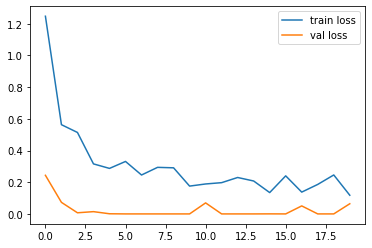

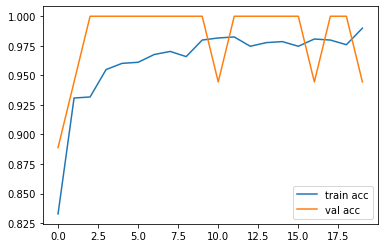

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [19]:

y_pred = model.predict(test_set)


In [20]:
y_pred

array([[0.0000000e+00, 4.2380188e-22, 5.1558406e-28, 1.0000000e+00],
       [2.5956231e-23, 1.6952220e-21, 1.0000000e+00, 1.1329873e-17],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.2134338e-36],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [3.0231095e-21, 0.0000000e+00, 1.0000000e+00, 3.5517945e-36],
       [0.0000000e+00, 1.7357047e-17, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.3949905e-29, 0.0000000e+00, 0.0000000e+00],
       [4.8918797e-10, 3.0211611e-36, 1.0000000e+00, 1.8550003e-24],
       [0.0000000e+00, 2.5112667e-31, 0.0000000e+00, 1.0000000e+00],
       [2.5819261e-38, 5.4326351e-31, 1.0000000e+00, 6.1263513e-37],
       [7.3996598e-23, 1.8099747e-27, 9.2434489e-30, 1.0000000e+00],
       [6.8477893e-01, 1.6445698e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__